**What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.
        

**Why Do We Need Feature Selection?**
 
*1.Reduces Overfitting 📉*
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.

*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.

*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.

*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.
 
 

**Types of Feature Selection Methods**

<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.
 
<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.
 
<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.
 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)
data= pd.DataFrame({
    'Size':np.random.randint(1000,5000,100),
    'Age':np.random.randint(1,50,100),
    'BedRooms':np.random.randint(1,5,100),
    'Price':np.random.randint(100000,500000,100),
})

In [5]:
data.head()

,Size,Age,BedRooms,Price
0,4174,18,2,189045
1,4507,26,2,134698
2,1860,44,1,210078
3,2294,34,2,442767
4,2130,10,1,122671


# Filter Method

In [7]:
corr_matrix=data.corr()
corr_matrix

,Size,Age,BedRooms,Price
Size,1.000000,0.096164,0.032047,0.067964
Age,0.096164,1.000000,0.052126,-0.127975
BedRooms,0.032047,0.052126,1.000000,-0.134591
Price,0.067964,-0.127975,-0.134591,1.000000


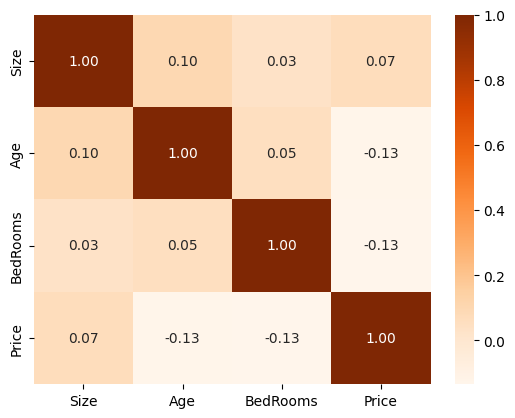

In [11]:
sns.heatmap(corr_matrix,annot=True,cmap='Oranges',fmt='.2f')
plt.show()

# Wrapper Method
**Select top 2 features**

In [12]:
x=data.drop(columns=['Price'])
y=data['Price']
model = RandomForestRegressor()
rfe=RFE(model,n_features_to_select=2)
x_sel=rfe.fit_transform(x,y)
print('Selected features using rfe:',x.columns[rfe.support_])

Selected features using rfe: Index(['Size', 'Age'], dtype='object')


# Embedded Method

In [14]:
lasso = Lasso(alpha=0.1)  # Initialize Lasso regression with a regularization parameter alpha
lasso.fit(x, y)  # Fit the Lasso model to the data
imp = np.abs(lasso.coef_)  # Get the absolute values of the model coefficients
sel_fea = x.columns[imp > 0]  # Select the features whose coefficients are non-zero
print('Selected features using lasso:', sel_fea)


Selected features using lasso: Index(['Size', 'Age', 'BedRooms'], dtype='object')
